# Data Programming question -PCA

Data: Auto MPG Data Set

Source: https://archive.ics.uci.edu/ml/datasets/Auto+MPG

### Import pandas, numpy, matplotlib

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### KNOW YOUR DATA SET

In [337]:
from IPython.display import IFrame

In [338]:
IFrame(src='https://archive.ics.uci.edu/ml/datasets/Auto+MPG', width=700, height=600)

### Read in file as a dataset

In [339]:
import requests
url_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original'
df_file = pd.read_csv(url_data)
df_file.head()

,"18.0 8. 307.0 130.0 3504. 12.0 70. 1. ""chevrolet chevelle malibu"""
0,15.0 8. 350.0 165.0 3693. 1...
1,18.0 8. 318.0 150.0 3436. 1...
2,16.0 8. 304.0 150.0 3433. 1...
3,17.0 8. 302.0 140.0 3449. 1...
4,15.0 8. 429.0 198.0 4341. 1...


In [340]:
df_file = pd.read_fwf(url_csv,header=None)
df_file.head()

,0,1,2,3,4,5,6,7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,"1.\t""chevrolet chevelle malibu"""
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,"1.\t""buick skylark 320"""
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,"1.\t""plymouth satellite"""
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,"1.\t""amc rebel sst"""
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,"1.\t""ford torino"""


## Ask to check using pandas for missing values

#### Let's set up our index

In [341]:
index = ['mpg',
         'cylinders',
         'displacement',
         'horsepower',
         'weight',
         'acceleration',
         'model year',
         'origin',
         'car name']
len(index)

9

In [342]:
print(df_file[7].head())
df_file[7][0]

0    1.\t"chevrolet chevelle malibu"
1            1.\t"buick skylark 320"
2           1.\t"plymouth satellite"
3                1.\t"amc rebel sst"
4                  1.\t"ford torino"
Name: 7, dtype: object


'1.\t"chevrolet chevelle malibu"'

In [343]:
def carModel(aString):
    substr = aString[4:-1]
    return substr

In [349]:
df_file[8] = df_file[7].apply(carModel)
df_file.head(30)

,0,1,2,3,4,5,6,7,8
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,"1.\t""chevrolet chevelle malibu""",chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,"1.\t""buick skylark 320""",buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,"1.\t""plymouth satellite""",plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,"1.\t""amc rebel sst""",amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,"1.\t""ford torino""",ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,"1.\t""ford galaxie 500""",ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,"1.\t""chevrolet impala""",chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,"1.\t""plymouth fury iii""",plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,"1.\t""pontiac catalina""",pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,"1.\t""amc ambassador dpl""",amc ambassador dpl


In [351]:
def origin(aString):
    substr = aString[0]
    return substr

In [447]:
df_file[7] = df_file[7].apply(origin)
df_file.head(30)

,0,1,2,3,4,5,6,7,8
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1,ford torino
5,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1,ford galaxie 500
6,14.0,8.0,454.0,220.0,4354.0,9.0,70.0,1,chevrolet impala
7,14.0,8.0,440.0,215.0,4312.0,8.5,70.0,1,plymouth fury iii
8,14.0,8.0,455.0,225.0,4425.0,10.0,70.0,1,pontiac catalina
9,15.0,8.0,390.0,190.0,3850.0,8.5,70.0,1,amc ambassador dpl


## Data cleaning: drop collumns with more than 30% missing rows … if there are any, then rows and/or ask to fill values with averages.

In [448]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
0    398 non-null float64
1    406 non-null float64
2    406 non-null float64
3    400 non-null float64
4    406 non-null float64
5    406 non-null float64
6    406 non-null float64
7    406 non-null object
8    406 non-null object
dtypes: float64(7), object(2)
memory usage: 28.6+ KB


### Obtain the table with quantitive (non-categorical data)

In [449]:
df = pd.DataFrame(np.array(df_file), columns=index)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18,8,307,130,3504,12,70,1,chevrolet chevelle malibu
1,15,8,350,165,3693,11.5,70,1,buick skylark 320
2,18,8,318,150,3436,11,70,1,plymouth satellite
3,16,8,304,150,3433,12,70,1,amc rebel sst
4,17,8,302,140,3449,10.5,70,1,ford torino


In [450]:
df.dropna()
print(df.shape)
df.describe()

(406, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.0,406.0,406.0,400.0,406.0,406.0,406.0,406,406
unique,129.0,5.0,83.0,93.0,356.0,96.0,13.0,3,312
top,13.0,4.0,97.0,150.0,1985.0,14.5,73.0,1,ford pinto
freq,20.0,207.0,22.0,22.0,4.0,23.0,40.0,254,6


In [451]:
df=df[index[0:7]]
print(df.shape)
df.head()

(406, 7)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18,8,307,130,3504,12,70
1,15,8,350,165,3693,11.5,70
2,18,8,318,150,3436,11,70
3,16,8,304,150,3433,12,70
4,17,8,302,140,3449,10.5,70


## Ask for summary statisics

In [452]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 7 columns):
mpg             398 non-null object
cylinders       406 non-null object
displacement    406 non-null object
horsepower      400 non-null object
weight          406 non-null object
acceleration    406 non-null object
model year      406 non-null object
dtypes: object(7)
memory usage: 22.3+ KB


In [453]:
print(df.shape)
df = df.dropna()
df.shape

(406, 7)


(392, 7)

## Ask for a task: 

explained variance graph

scatter plot of the projected data

and bar graph of the first 3 components

In [454]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [455]:
x = np.round(pca.explained_variance_ratio_,decimals=3)*100

In [456]:
y = range(1,len(x)+1)

In [457]:
ylabel = 'Principal Component %'
chart = pd.DataFrame(x,index=y,columns=[ylabel])
chart

,Principal Component %
1,99.8
2,0.2
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0


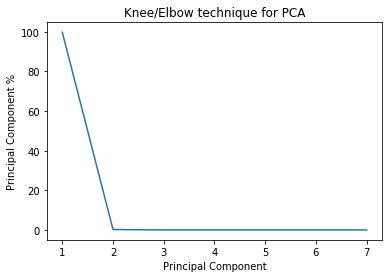

In [460]:
plt.plot(y,x)
plt.ylabel(ylabel)
plt.xlabel('Principal Component')
plt.title('Knee/Elbow technique for PCA');

In [478]:
pca=PCA(n_components=2)
loading = sklearn.preprocessing.StandardScaler().fit_transform(df)
X = pca.fit_transform(loading)
principalDf = pd.DataFrame(X, columns=['PC1','PC2'])
principalDf.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,PC1,PC2
0,2.635049,0.929039
1,3.493800,0.805473
2,2.970415,0.881186
3,2.910197,0.961721
4,2.903826,0.952789


Text(0.5, 1.0, 'Principal Comp. 1 vs. Principal Comp. 2')

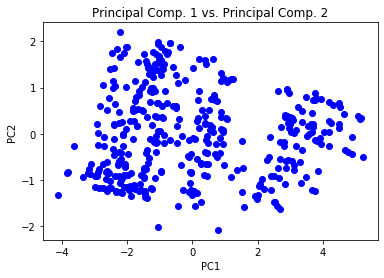

In [485]:
plt.plot(principalDf['PC1'],principalDf['PC2'],'bo')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal Comp. 1 vs. Principal Comp. 2')

In [508]:
#plt.plot?
plt.bar?

Text(0.5, 1.0, 'Features vs. Principal Comp. 1 weight')

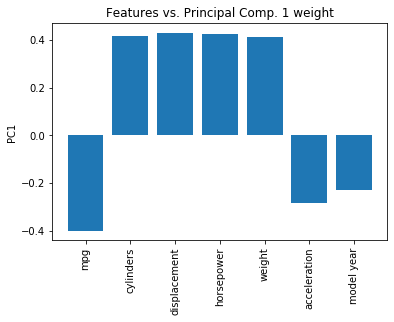

In [518]:
plt.bar(df.columns,pca.components_[0].T,width=.8)
plt.xticks(df.columns,rotation=90)
plt.ylabel('PC1')
plt.title('Features vs. Principal Comp. 1 weight')